# Wahlomat data from the election 2025 is preprocessed, to function as validation material


In [41]:
# Setup -load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load data 
wahlomat_data = pd.read_csv("../data/Wahl-O-Mat-Bundestagswahl-2025.csv", sep = ";")

In [42]:
# renaming columns
wahlomat_data = wahlomat_data.rename(columns={
    'Partei: Nr.': 'party_nr',
    'Partei: Kurzbezeichnung': 'party',
    'Partei: Name': 'party_long_name',
    'These: Nr.': 'thesis_nr',
    'These: Titel': 'thesis_title',
    'These: These': 'thesis',
    'Position: Position': 'party_position',
    'Position: Begründung': 'party_justification'
})

In [43]:
wahlomat_data

,party_nr,party,party_long_name,thesis_nr,thesis_title,thesis,party_position,party_justification
0,1,SPD,Sozialdemokratische Partei Deutschlands,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,"Die SPD bekennt sich klar zur diplomatischen, ..."
1,2,CDU / CSU,Christlich Demokratische Union Deutschlands / ...,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,Unser Ziel ist Frieden in Europa. Die Ukraine ...
2,3,GRÜNE,BÜNDNIS 90/DIE GRÜNEN,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,Millionen Ukrainer*innen verteidigen Tag für T...
3,4,FDP,Freie Demokratische Partei,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,Unsere Unterstützung für die Ukraine darf nich...
4,5,AfD,Alternative für Deutschland,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme nicht zu,Wir fordern von allen Kriegsparteien eine Eins...
...,...,...,...,...,...,...,...,...
1059,24,BüSo,Bürgerrechtsbewegung Solidarität,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,Jeder sollte von seiner Arbeit leben können. F...
1060,25,BÜNDNIS DEUTSCHLAND,BÜNDNIS DEUTSCHLAND,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme nicht zu,Die Mindestlohnregelungen stellen einen gravie...
1061,26,BSW,Bündnis Sahra Wagenknecht – Vernunft und Gerec...,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,NaN
1062,27,MERA25,MERA25 - Gemeinsam für Europäische Unabhängigkeit,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,Wir setzen uns ein für einen bundesweiten effe...


In [44]:
# Since CDU and CSU are a shared category here, dublicate rows and separate for validation of models later
# Step 1: Filter rows to duplicate
cdu_csu_rows = wahlomat_data[wahlomat_data["party"] == 'CDU / CSU']

# Step 2: Create copies with 'CDU' and 'CSU'
cdu_rows = cdu_csu_rows.copy()
cdu_rows['party'] = 'CDU'

csu_rows = cdu_csu_rows.copy()
csu_rows['party'] = 'CSU'

# Step 3: Remove original 'CDU / CSU' rows and append new ones
wahlomat_data = wahlomat_data[wahlomat_data['party'] != 'CDU / CSU']
wahlomat_data = pd.concat([wahlomat_data, cdu_rows, csu_rows], ignore_index=True)


In [45]:
wahlomat_data["party"].unique()

# renaming parties for consistency with main data frame
wahlomat_data["party"] = wahlomat_data["party"].replace({'Die Linke': 'DIE LINKE'})

# keeping only rows with valid 7 parties
valid_parties = ['SPD', 'CDU', 'CSU', 'GRÜNE', 'FDP', 'AfD', 'DIE LINKE']
wahlomat_data = wahlomat_data[wahlomat_data['party'].isin(valid_parties)]

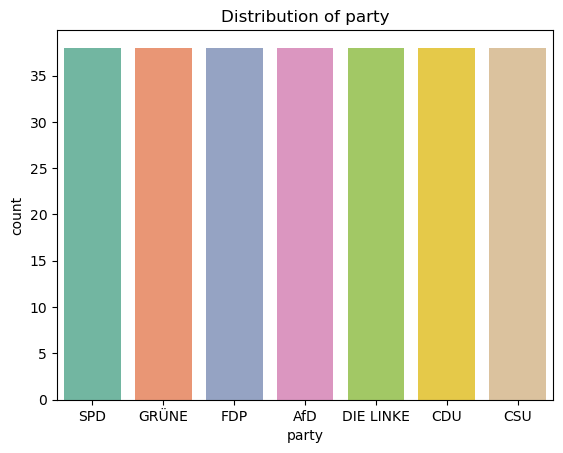

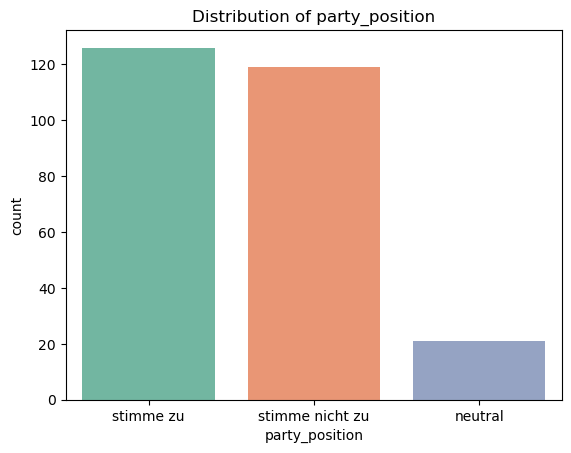

In [52]:
# Visualising features in barplots where information is sensical

# subsetting columns that can be interesting
features_to_plot = ['party', 'party_position']

# visualising
for coloumn in features_to_plot:
    order = wahlomat_data[coloumn].value_counts().index
    sns.countplot(data=wahlomat_data, x=coloumn, order = order, palette='Set2')
    plt.title(f'Distribution of {coloumn}')
    plt.show()

In [57]:
# show all theis titles and whole thesis:
all_titles = wahlomat_data["thesis_title"].unique()
all_thesis = wahlomat_data["thesis"].unique()

i = 0
for title in all_titles:
    i += 1
    print(f"Thesis title {i}: {title} \n Content: {all_thesis[i-1]}")

Thesis title 1: Unterstützung der Ukraine 
 Content: Deutschland soll die Ukraine weiterhin militärisch unterstützen.
Thesis title 2: Erneuerbare Energien 
 Content: Der Ausbau erneuerbarer Energien soll weiterhin vom Staat finanziell gefördert werden.
Thesis title 3: Streichung des Bürgergelds 
 Content: Das Bürgergeld soll denjenigen gestrichen werden, die wiederholt Stellenangebote ablehnen.
Thesis title 4: Tempolimit auf Autobahnen 
 Content: Auf allen Autobahnen soll ein generelles Tempolimit gelten.
Thesis title 5: Abweisung Asylsuchender 
 Content: Asylsuchende, die über einen anderen EU-Staat eingereist sind, sollen an den deutschen Grenzen abgewiesen werden.
Thesis title 6: Begrenzung der Mietpreise 
 Content: Bei Neuvermietungen sollen die Mietpreise weiterhin gesetzlich begrenzt werden.
Thesis title 7: Automatisierte Gesichtserkennung 
 Content: An Bahnhöfen soll die Bundespolizei Software zur automatisierten Gesichtserkennung einsetzen dürfen.
Thesis title 8: Energieintensi

In [58]:
wahlomat_data["party_position"].unique()

array(['stimme zu', 'stimme nicht zu', 'neutral'], dtype=object)

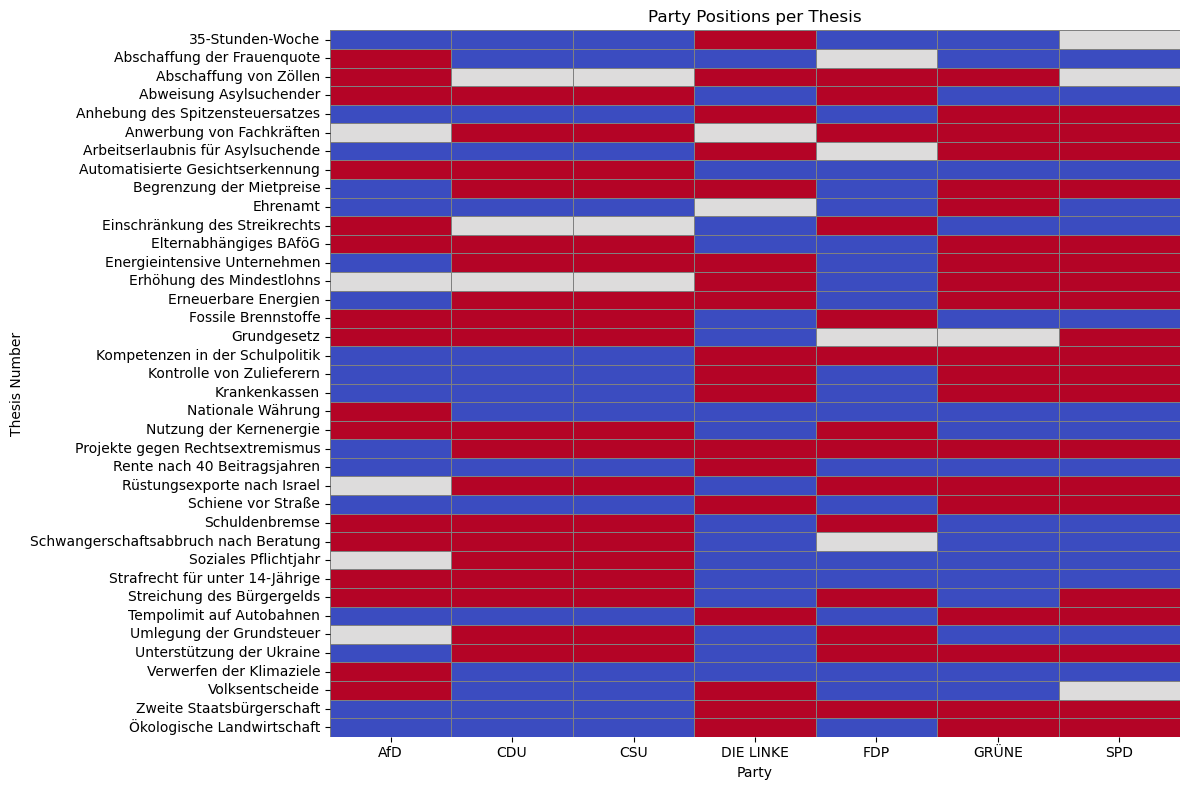

In [63]:
# visualizing party positions towards theses

# first make numerical column as preparation
opinion_map = {
    'stimme zu': 1,
    "neutral": 0,
    'stimme nicht zu': -1
}
wahlomat_data['opinion_num'] = wahlomat_data['party_position'].map(opinion_map)

# second, pivotting
pivot = wahlomat_data.pivot(index='thesis_title', columns='party', values='opinion_num')

# third, plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', center=0, annot=False, cbar=False,
            linewidths=0.5, linecolor='gray')

plt.title("Party Positions per Thesis")
plt.xlabel("Party")
plt.ylabel("Thesis Number")
plt.tight_layout()
plt.show()